<a href="https://colab.research.google.com/github/Pagido/projet/blob/main/bless%C3%A9(e).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pension selon la gravité des blessures

In [ ]:
! pip install mca

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6009 sha256=29caeee08bcd659827ae8d5b4f14863eedf2a1820456be6d2d4622712d82f8a6
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
import pandas as pd
import os #module pour connaitre et modifier le répertoire courant où Python cherche les modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install fanalysis
from fanalysis.ca import CA as fCA
from fanalysis.mca import MCA as fMCA
from mca import MCA
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Data/blesse(e).xlsx"

data = pd.read_excel("/content/drive/My Drive/Data/blesse(e).xlsx", index_col = 0)
data.head()

Mounted at /content/drive


,Nature des faits,Nature des faits (normalisé),profession,decision
id,,,,
152,contusion,blessé(e),artisan,1000 fr ≤ x ≤ 1500 fr
225,amputation,blessé(e),Entrepreneurs commerciaux,500 fr ≤ x ≤ 900 fr
274,amputation,blessé(e),Entrepreneurs commerciaux,500 fr ≤ x ≤ 900 fr
293,fracture,blessé(e),artisan,1000 fr ≤ x ≤ 1500 fr
319,contusion,blessé(e),artisan,1000 fr ≤ x ≤ 1500 fr


In [ ]:
data['Nature des faits'].value_counts()

In [ ]:
data['decision)'].value_counts()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
#df.dtypes
data.describe()

In [ ]:
contingence = pd.crosstab(data['Nature des faits'], data['decision'],  margins = True)
contingence

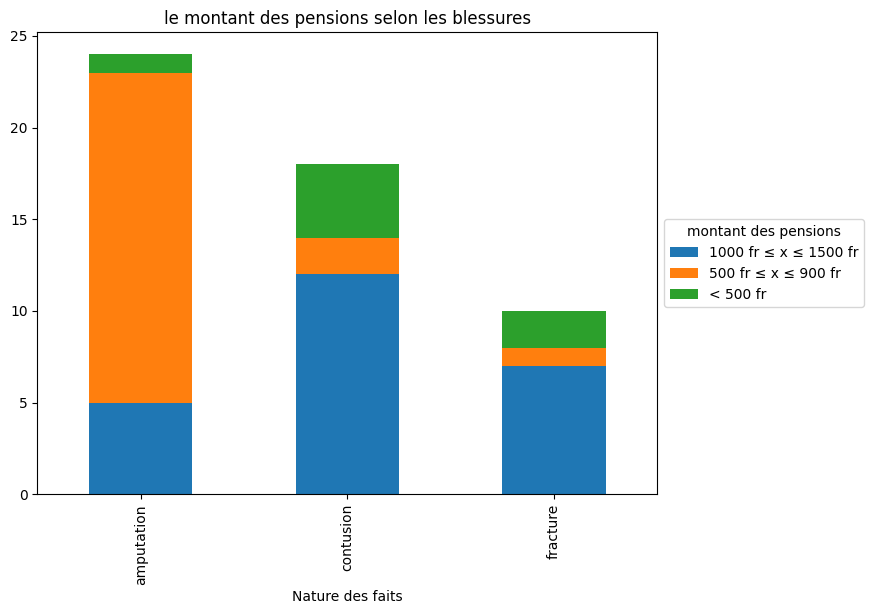

In [ ]:
# Calculer la table de contingence
contingence = pd.crosstab(data['Nature des faits'], data['decision'], margins=False)

# Tracer le graphique à barres empilées
ax = contingence.plot.bar(stacked=True, figsize=(8, 6), title="le montant des pensions selon les blessures")

# Placer la légende à côté du graphique
plt.legend(title='montant des pensions', loc='center left', bbox_to_anchor=(1, 0.5))

# Afficher le graphique
plt.show()

#### Répondez à la question avec un test statistique

In [ ]:
contingence = pd.crosstab(data['Nature des faits'], data['decision'],  margins = False)
stats.chi2_contingency(contingence) #Test d'indépendance du Khi² dans la librairie scipy
#Khi2obs, pvalue, ddl, effectifs_theorique =stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=22.317526455026456, pvalue=0.0001732607167938212, dof=4, expected_freq=array([[11.07692308,  9.69230769,  3.23076923],
       [ 8.30769231,  7.26923077,  2.42307692],
       [ 4.61538462,  4.03846154,  1.34615385]]))